# Analiza knjig
V tej datoteki bom analizirala knjige, katerih podatke sem dobila na spletni strani Open Library.

Najprej si oglejmo vse knjige in njihove podatke.

In [49]:
import pandas as pd
import seaborn as sns
knjige = pd.read_csv("datoteka.csv")
knjige.index = knjige.index + 1
knjige["naslov"] = knjige["naslov"].str.replace("&#39;", "'")
knjige

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
1,El hombre mas rico de Babilonia,2014,George Hill,3.00,6
2,A Game of Thrones,1996,George R. R. Martin,4.24,552
3,Fifty Shades of Grey,2000,E. L. James,3.92,231
4,I Don't Love You Anymore,2020,Rithvik Singh,3.03,65
5,Twisted Lies,2022,Ana Huang,4.07,117
...,...,...,...,...,...
83,Auctions,2016,Timothy P. Hubbard,5.00,2
84,The LOCUS distributed system architecture,1985,Bruce James Walker,3.00,1
85,Machine interpretation of line drawings,1986,Kökichi Sugihara,4.50,2
86,Border wars,2011,Tom Barry,5.00,1


Bolj zanimivo bi si jih bilo ogledati razvrščene po oceni.

In [50]:
knjige.sort_values('ocena', ascending=False)

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
20,God's good man: a simple love-story,1894,Marie Corelli,5.0,1
59,Wedding for One / Tattoo for Two,2003,Dawn Atkins,5.0,1
86,Border wars,2011,Tom Barry,5.0,1
47,The Darcy cousins,2010,Monica Fairview,5.0,1
45,We'll never be apart,2015,Emiko Jean,5.0,2
...,...,...,...,...,...
44,Surgical dressings and wound healing,1971,Keith James Harkiss,3.0,1
87,Open for business,2012,Judith A. Layzer,3.0,1
77,Standardized test preparation,2000,Bob Partain,2.0,1
55,Baby Dreams,1996,Hannah Howell,1.0,1


Opazimo, da so na vrhu in na dnu knjige s čisto najvišjo ali najnižjo možno oceno, ker jih je v bistvu ocenila le 1 oseba. Zato se raje omejimo na knjige, ki so dobile vsaj 10 ocen.

In [51]:
knjige[knjige.stevilo_ocen >= 10].sort_values('ocena', ascending=False)

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
69,Works (Carrie / Night Shift / 'Salem's Lot / S...,1981,Stephen King,4.80,20
68,Sahara,1982,Clive Cussler,4.46,24
9,Bumi,2014,Tere Liye,4.43,53
42,Stellaluna,1990,Janell Cannon,4.36,99
31,Animal Farm / Nineteen Eighty-Four,1978,George Orwell,4.35,17
32,The Gruffalo,1999,Julia Donaldson,4.29,52
6,How to Win Friends and Influence People,1913,Dale Carnegie,4.28,256
71,Vixen 03,1976,Clive Cussler,4.27,22
10,Harry Potter and the Philosopher's Stone,1997,J. K. Rowling,4.25,736
2,A Game of Thrones,1996,George R. R. Martin,4.24,552


Opazimo lahko, da na tem seznamu ni veliko knjig z nizkimi ocenami, zato bi lahko preverili, ali obstaja kakšna povezava med oceno in številom ocen. Naša hipoteza je torej, da so knjige z večjim številom ocen boljše ocenjene. Na grafu bom uporabila logaritemsko skalo za y os, da se bo boljše videlo.

<Axes: xlabel='ocena', ylabel='stevilo_ocen'>

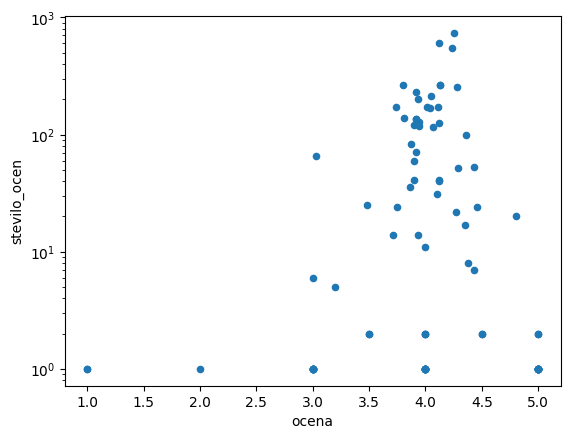

In [52]:
knjige.plot.scatter("ocena", "stevilo_ocen", logy=True)

Očitno je bila naša hipoteza pravilna. Vse knjige, ki imajo več kot 100 ocen, imajo skupno oceno več kot 3,5. 

Oglejmo si, koliko knjig ima kakšno oceno.

<Axes: xlabel='ocena', ylabel='Count'>

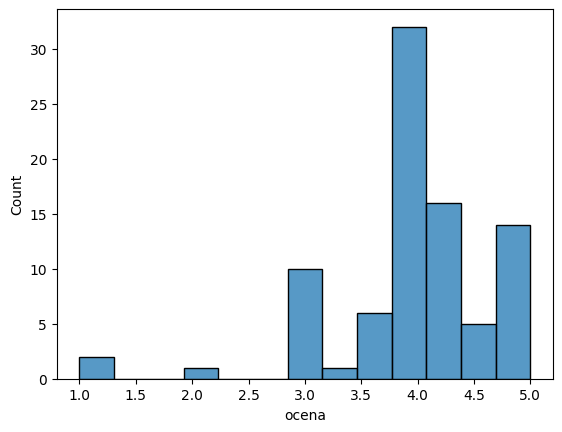

In [53]:
sns.histplot(knjige, x="ocena", binwidth=0.3)

Na spletni strani je torej največ takih knjig, ki imajo oceno okoli 4. To je čisto smiselno, saj je njihov namen imeti tu zbrane vse knjige, začeli pa so z najbolj priljubljenimi.